Importing Libraries and Dataset 

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
adf = pd.read_csv('Advertising.csv', index_col=0)
adf.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:

adf.describe()



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
adf.isna().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Analysis Of Different Parameters 

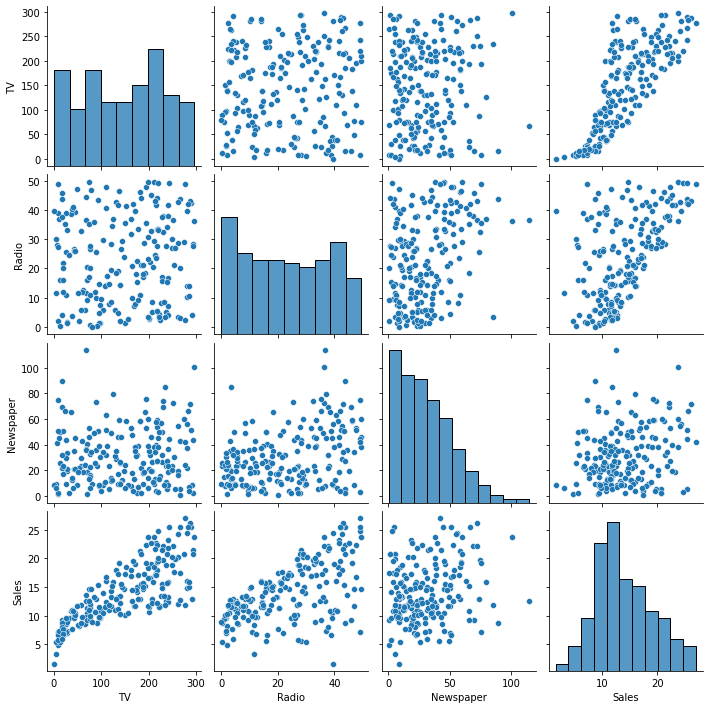

In [ ]:
sns.pairplot(adf)



Hwatmap Analysis Of the data

<AxesSubplot:>

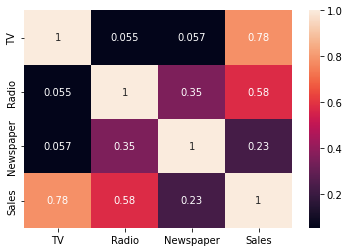

In [ ]:

sns.heatmap(adf.corr(), annot=True)


Splitting and fitting into Linear Regression Model

In [ ]:


X = adf[['TV', 'Radio', 'Newspaper']]
y = adf['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Accuracies and Predictions 

In [ ]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R2 score:', r2)



Mean squared error: 3.174097353976104
R2 score: 0.899438024100912


Prediction Curve 

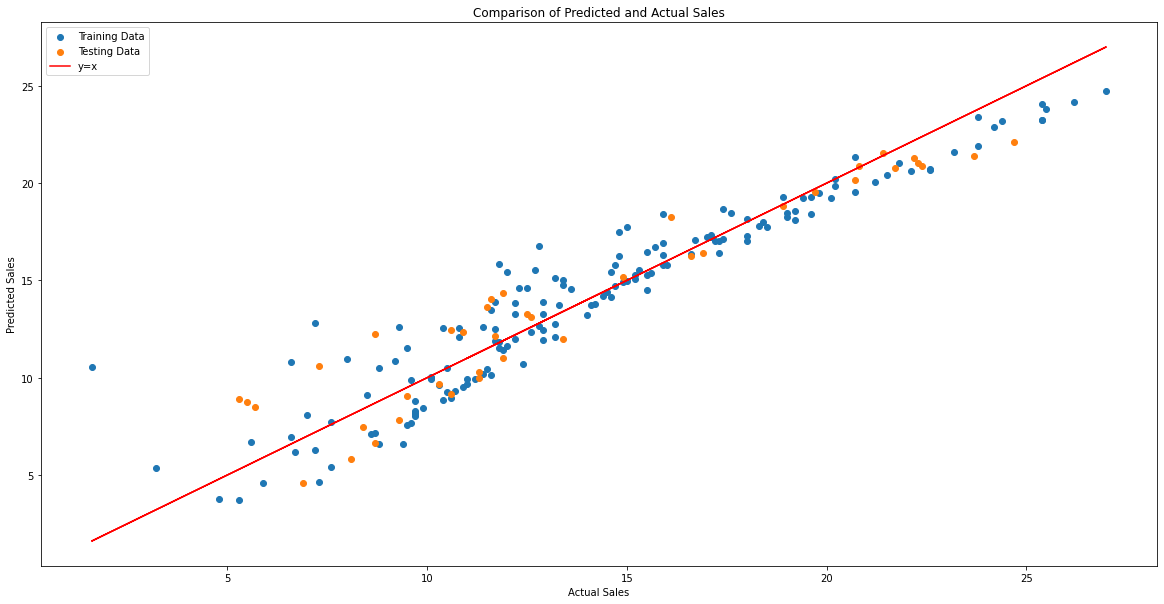

In [ ]:

y_pred_train = model.predict(X_train)
plt.figure(figsize=(20,10))
plt.scatter(y_train, y_pred_train, label='Training Data')
plt.scatter(y_test, y_pred, label='Testing Data')
plt.plot(y_train, y_train, 'r-', label='y=x')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Comparison of Predicted and Actual Sales')
plt.legend()
plt.show()